In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [33]:
df.shape

(14999, 10)

In [34]:
left = df[df['left'] == 1]
left
left.shape

(3571, 10)

In [35]:
retained = df[df['left'] == 0]
retained
retained.shape

(11428, 10)

In [36]:
df.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


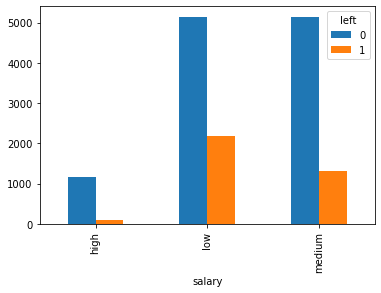

In [37]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

In [38]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [39]:
salary = pd.get_dummies(data["salary"], prefix="salary")
salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [40]:
new_df = pd.concat([data,salary],axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [41]:
new_df.drop(['salary','salary_high'], axis=1, inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [42]:
X = new_df.copy()
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [43]:
y = df["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=99)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((10499, 5), (4500, 5), (10499,), (4500,))

In [45]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression(solver='liblinear')
lr.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

In [46]:
y_pred = lr.predict(test_x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
lr.score(test_x,test_y)

0.7724444444444445

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [50]:
confusion_matrix(test_y,y_pred)

array([[3202,  229],
       [ 795,  274]])

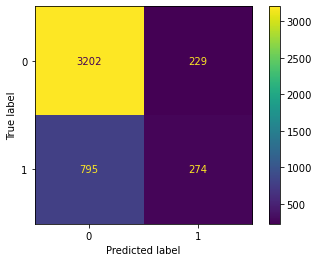

In [51]:
plot_confusion_matrix(lr, test_x, test_y)